In [74]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [75]:
from floater import hexgrid
reload(hexgrid)

<module 'floater.hexgrid' from '/Users/rpa/RND/Public/floater/floater/hexgrid.so'>

In [135]:
lav = np.load('../testdata/lav_patch_02.npz')

In [136]:
lav.keys()

['Y1', 'lavabs', 'X0', 'X1', 'Y0']

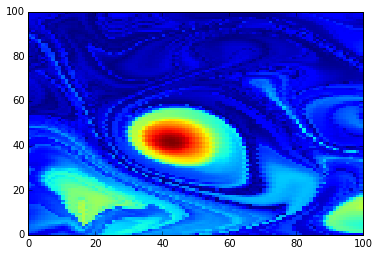

In [137]:
plt.pcolormesh(lav['lavabs'])
d = lav['lavabs'].ravel()
x0 = lav['X0'].ravel()
y0 = lav['Y0'].ravel()
x1 = lav['X1'].ravel()
y1 = lav['Y1'].ravel()
D = lav['lavabs']
X0 = lav['X0']
Y0 = lav['Y0']
X1 = lav['X1']
Y1 = lav['Y1']

In [138]:
hg = hexgrid.HexArray(lav['lavabs'])

In [139]:
#x0, y0 = np.array([hg.pos(n) for n in xrange(hg.N)]).T

In [140]:
cpts = hg.classify_critical_points()
max_idx = np.where(cpts==1)[0]
max_idx.shape

(657,)

(52.828125, 55.921875)

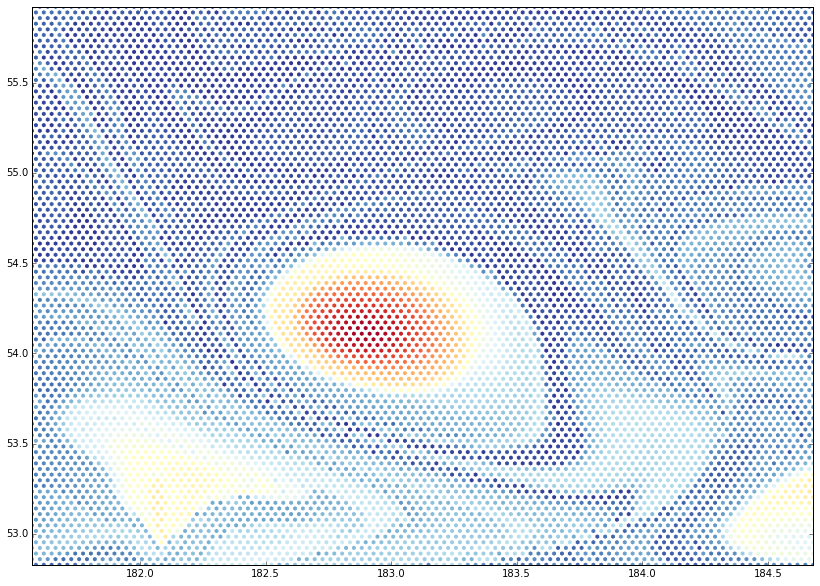

In [141]:
plt.figure(figsize=(14,10))
plt.scatter(x0, y0, c=d, s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')
plt.xlim([x0.min(), x0.max()])
plt.ylim([y0.min(), y0.max()])


<matplotlib.colorbar.Colorbar instance at 0x109134170>

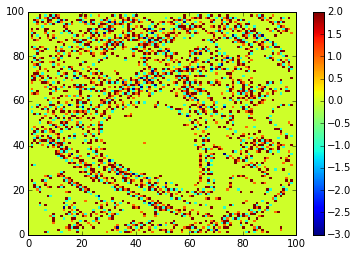

In [142]:
plt.pcolormesh(cpts)
plt.colorbar()

In [143]:
minarea = 166
creg = hexgrid.find_convex_regions(lav['lavabs'], minsize=minarea)

In [144]:
reg = creg[0]
print len(reg.members)

351


In [145]:
reg.first_point
#idx = ordered_points
idx = list(reg.members)
ib = list(reg.interior_boundary())
ibo = list(reg.interior_boundary_ordered())

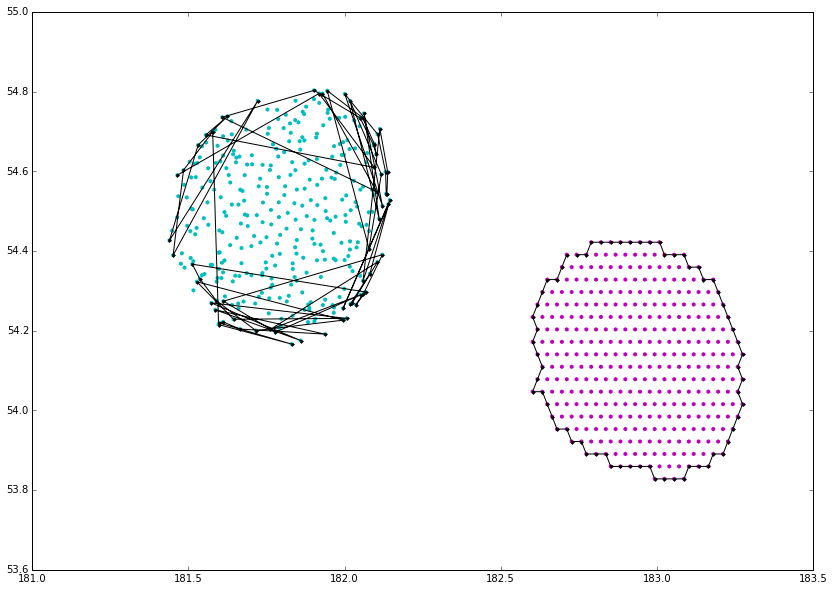

In [147]:
plt.figure(figsize=(14,10))
plt.scatter(x0[idx], y0[idx], c='m', s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')
#plt.scatter(x0[ib], y0[ib], c='k', s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')
plt.plot(x0[ibo], y0[ibo], 'k.-')

plt.scatter(x1[idx], y1[idx], c='c', s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')
#plt.scatter(x1[ib], y1[ib], c='k', s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')
plt.plot(x1[ibo], y1[ibo], 'k.-')
#plt.xlim([x0.min(), x0.max()])
#plt.ylim([y0.min(), y0.max()])

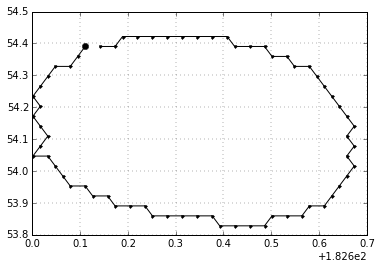

In [148]:
plt.plot(x0[ibo], y0[ibo], 'k.-')
plt.plot(x0[ibo[0]], y0[ibo[0]], 'ko')

# from 6094 adding 6095
# from 6095 adding 6096
# from 6096 adding 5956
# from 5956 adding 5957
# from 5957 adding 5958

#plt.plot(x0[6094], y0[6094], '^')
#plt.plot(x0[6095], y0[6095], '^')
#plt.plot(x0[6096], y0[6096], '^')
#plt.plot(x0[5956], y0[5956], '^')

plt.grid()


In [149]:
#reg.first_point
j, i = hg.ji_from_n(reg.first_point)

In [150]:
import critical_points
reload(critical_points)

<module 'critical_points' from 'critical_points.pyc'>

In [151]:
lavhex = critical_points.HexArray(lav['lavabs'])
jreg, ireg = lavhex.convex_region(j,i)

In [152]:
jb, ib, diff = lavhex.get_neighbors(jreg, ireg)
jpt, ipt = critical_points.hexcoords2points(jreg, ireg)
jptb, iptb = critical_points.hexcoords2points(jb, ib)
points = np.vstack([ipt, jpt]).T
bpoints = np.vstack([iptb, jptb]).T
print len(points)
print len(ireg)
critical_points.test_convex(points, bpoints)

327
327


True

In [153]:
len(jreg)

327

In [154]:
oreg = hexgrid.HexArrayRegion(hg, reg.first_point)
for j0, i0 in zip(jreg, ireg):
    oreg.add_point(hg.N_from_ji(j0, i0))
oidx = list(oreg.members)
oibo = list(oreg.interior_boundary_ordered())

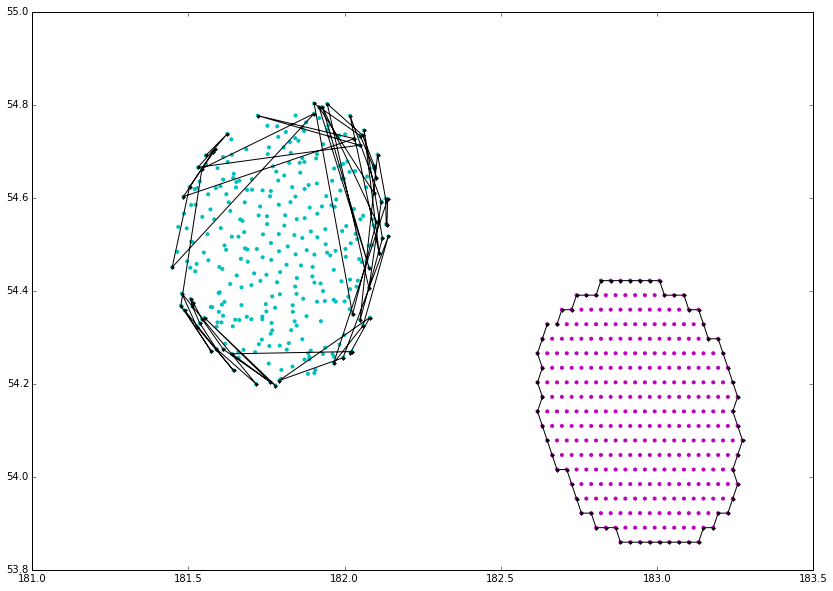

In [156]:
plt.figure(figsize=(14,10))
plt.scatter(x0[oidx], y0[oidx], c='m', s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')
#plt.scatter(x0[ib], y0[ib], c='k', s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')
plt.plot(x0[oibo], y0[oibo], 'k.-')

plt.scatter(x1[oidx], y1[oidx], c='c', s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')
#plt.scatter(x1[ib], y1[ib], c='k', s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')
plt.plot(x1[oibo], y1[oibo], 'k.-')
#plt.xlim([x0.min(), x0.max()])
#plt.ylim([y0.min(), y0.max()])

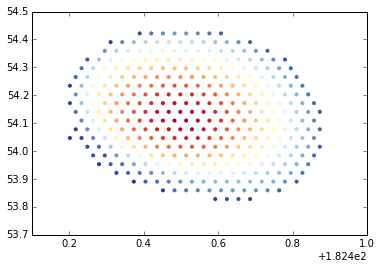

In [157]:
plt.scatter(x0[idx], y0[idx], c=d[idx], s=20, marker='h', edgecolor='none', cmap='RdYlBu_r')

(53.5, 55)

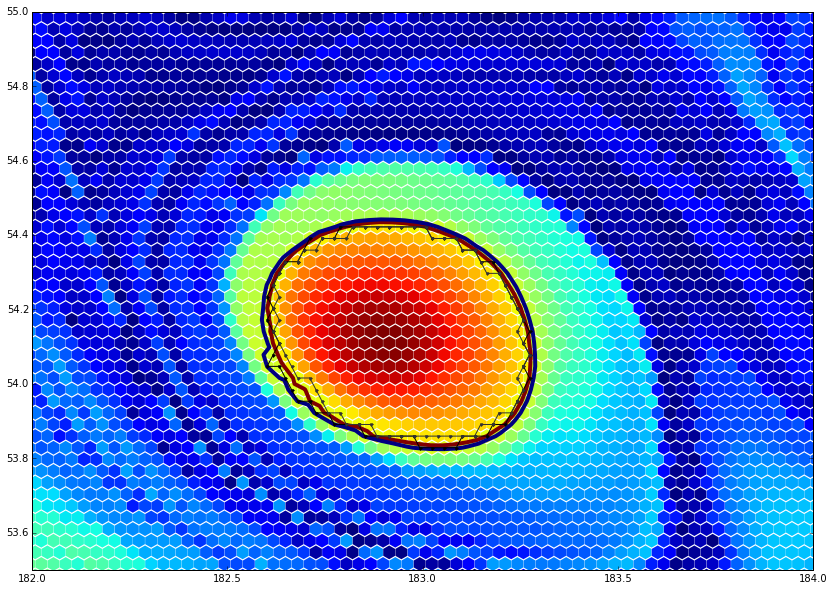

In [163]:
plt.figure(figsize=(14,10))
plt.scatter(x0, y0, c=d, s=190, marker='h', edgecolor='none', cmap='jet')
plt.plot(x0[ibo], y0[ibo], 'k.-')
plt.plot(x0[oibo], y0[oibo], '.-', color='0.2')
C = plt.contour(X0, Y0, D, [d[oibo].min(), d[ibo].min()], linewidths=4)

#plt.xlim([187.5,189])
#plt.ylim([-46,-45])
plt.xlim([182,184])
plt.ylim([53.5,55])

In [164]:
reg_points = np.array([hg.pos(n) for n in oreg.members])
reg_bpoints = np.array([hg.pos(n) for n in oreg.exterior_boundary()])
print critical_points.test_convex(reg_points, reg_bpoints)
print critical_points.test_convex(points, bpoints)

True
True


In [165]:
points.shape

(327, 2)

In [166]:
new_points = np.array([hg.pos(n) for n in idx])
new_bpoints = np.array([hg.pos(n) for n in reg.exterior_boundary()])
print critical_points.test_convex(new_points, new_bpoints)

False


In [167]:
new_points.shape

(351, 2)

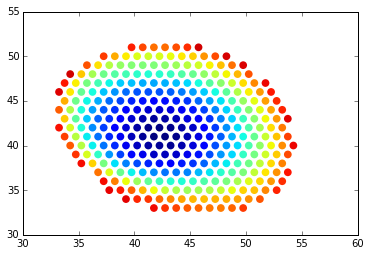

In [168]:
plt.scatter(*points.T, c=np.arange(points.shape[0]), s=60, edgecolor='none')
plt.clim([0, new_points.shape[0]])

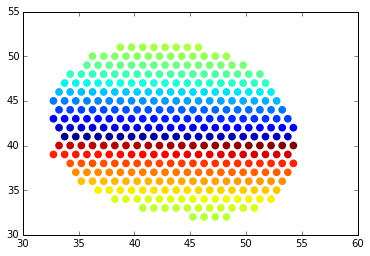

In [169]:
plt.scatter(*new_points.T, c=np.arange(new_points.shape[0]), s=60, edgecolor='none')
plt.clim([0, new_points.shape[0]])

In [170]:
# can't do this any more
for (p1, p2) in zip(points, new_points):
    pass
    #assert np.all(p1 == p2)

How to find out the difference
- Find the "next" point to be added to the smaller region using both codes--is it the same?
- If so, check the convexity of the expanded set?

In [171]:
dmax = lav['lavabs'][j,i]
nxt = np.argmin(dmax-diff)
print nxt, dmax-diff[nxt]

14 5.05286516272e-06


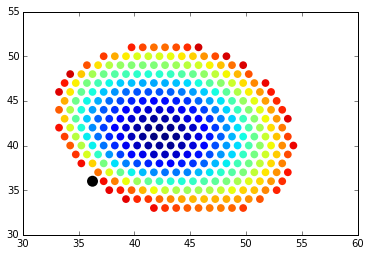

In [172]:
plt.scatter(*points.T, c=np.arange(points.shape[0]), s=60, edgecolor='none')
plt.clim([0, new_points.shape[0]])
plt.scatter(*bpoints[nxt], c='k', s=120, edgecolor='none')


In [173]:
# ok, now see if the other methods gets the same point!
print len(oreg.exterior_boundary())
print len(bpoints)

70
70


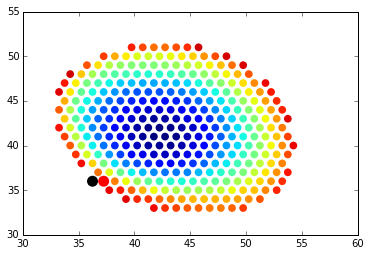

In [174]:
eb = list(oreg.exterior_boundary())
idx_eb = np.argmin((dmax-d[eb]))
Nnew = eb[idx_eb]

plt.scatter(*points.T, c=np.arange(points.shape[0]), s=60, edgecolor='none')
plt.clim([0, new_points.shape[0]])
plt.scatter(*hg.pos(Nnew), c='k', s=120, edgecolor='none')
plt.scatter(*hg.pos(Nnew+1), c='r', s=120, edgecolor='none')


In [175]:
# now try adding point to check convexity
print oreg.still_convex(Nnew)
oreg.add_point(Nnew)
print oreg.is_convex()

True
True


In [176]:
# now try the other module
print critical_points.test_convex(
    np.array([hg.pos(n) for n in oreg.members]),
    np.array([hg.pos(n) for n in oreg.exterior_boundary()]))
oreg.remove_point(Nnew)

False


## Found the difference!!!

In [130]:
%timeit oreg.is_convex()
%timeit critical_points.test_convex( np.array([hg.pos(n) for n in oreg.members]), np.array([hg.pos(n) for n in oreg.exterior_boundary()]))

1000 loops, best of 3: 392 µs per loop
1000 loops, best of 3: 1.11 ms per loop


In [131]:
from scipy.spatial import qhull
oreg.add_point(Nnew)
ibpoints = np.array([hg.pos(pt) for pt in oreg.interior_boundary()])
hull = qhull.ConvexHull(ibpoints)
hull_vertices = hull.points[hull.vertices]
print len(hull_vertices)

17


In [132]:
hull.vertices[0]

37

In [133]:
Nverts = len(hull.vertices)
hull_vertices = np.zeros((Nverts+1,2), hull.points.dtype)
hull_vertices[:Nverts] = hull.points[hull.vertices]
hull_vertices[Nverts] = hull.points[hull.vertices[0]]
print len(hull_vertices)

18


In [134]:
%timeit hull_vertices = hull.points[hull.vertices]
%timeit hull_vertices = np.zeros((len(hull.vertices)+1,2), hull.points.dtype); hull_vertices[:-1] = hull.points[hull.vertices]

The slowest run took 15.52 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 1.94 µs per loop
The slowest run took 6.31 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.78 µs per loop


NameError: name 'new_points' is not defined

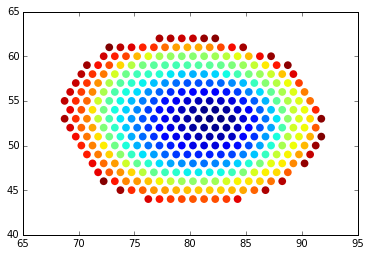

In [58]:
plt.scatter(*points.T, c=np.arange(points.shape[0]), s=60, edgecolor='none')
plt.clim([0, new_points.shape[0]])
plt.scatter(*hg.pos(Nnew), c='k', s=120, edgecolor='none')
plt.plot(*hull_vertices.T)

This shows that the hexgrid.point_in_poly method does NOT identify the neighboring point as inside the region. What about the matplotlib-based method?

In [59]:
print hexgrid.point_in_poly(hull_vertices, *hg.pos(reg.first_point))
print hexgrid.point_in_poly(hull_vertices, *hg.pos(Nnew+1))
print hexgrid.point_in_poly(hull_vertices, *hg.pos(Nnew-20))


True
True
False


In [60]:
# same as hull_vertices but list
vertices = [[ibpoints[v,0], ibpoints[v,1]] for v in hull.vertices]
# close polygon
vertices.append(vertices[-1])

In [61]:
import matplotlib.path as mplPath

def mpl_point_in_poly(vertices, pt):
    codes = np.ones(len(vertices)) * mplPath.Path.LINETO
    codes[0] = mplPath.Path.MOVETO
    codes[-1] = mplPath.Path.CLOSEPOLY
    bbPath = mplPath.Path(vertices, codes)
    return bbPath.contains_point(pt, radius=0.0)

print mpl_point_in_poly(vertices, hg.pos(reg.first_point))
print mpl_point_in_poly(vertices, hg.pos(Nnew+1))
print mpl_point_in_poly(vertices, hg.pos(Nnew-20))

1
1
0


In [66]:
%timeit hexgrid.mpl_point_in_poly(np.array(vertices), *hg.pos(Nnew+1))

The slowest run took 4.13 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 41.5 µs per loop


In [67]:
%timeit mpl_point_in_poly(np.array(vertices), hg.pos(Nnew+1))

The slowest run took 4.34 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 35.3 µs per loop


In [ ]:
np.vstack([hull_vertices, hull_vertices[0]])

In [71]:
qverts = np.array(hexgrid.get_qhull_verts(bpoints))

In [72]:
testpt = hg.pos(Nnew+1)
hexgrid.mpl_point_in_poly(qverts, *testpt)

True

In [73]:
%timeit hexgrid.mpl_point_in_poly(qverts, *testpt)
%timeit hexgrid.point_in_poly(qverts, *testpt)

10000 loops, best of 3: 33.9 µs per loop
100000 loops, best of 3: 1.78 µs per loop


In [ ]:
import pstats, cProfile

cProfile.runctx(
"""
for n in range(100000):
    hexgrid.mpl_point_in_poly(qverts, *testpt)
""", globals(), locals(), "Profile.prof")

s = pstats.Stats("Profile.prof")
s.strip_dirs().sort_stats("time").print_stats()